In [512]:
#All imports which are used below
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate as cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [513]:
#Read the file
df = pd.read_csv("./Titanic.csv")
df = df.replace(np.nan, '')
df = df[["pclass","survived","sex","age","sibsp","parch","ticket","fare","cabin","embarked","boat","body"]]

In [514]:
#Create dictionary to plot the data
def createDict(listName,survivedList):
    dictTemp = {}
    for i in range(0,len(survivedList)):
        if listName[i] == "":
            continue
        if(listName[i] in dictTemp):
            if(survivedList[i] == 1):
                dictTemp[listName[i]][0] = dictTemp[listName[i]][0] + 1
            else:
                dictTemp[listName[i]][1] = dictTemp[listName[i]][1] + 1
        else:
            if(survivedList[i] == 1):
                dictTemp[listName[i]] = [1,0]
            else:
                dictTemp[listName[i]] = [0,1]
    return dictTemp

In [515]:
#Create list so that we can plot the data in for loop
def createList(dictName):
    survivorList = []
    NonSurvivorList = []
    for i in dictName.keys():
        survivorList.append(dictName[i][0])
        NonSurvivorList.append(dictName[i][1])
    return [survivorList,NonSurvivorList]

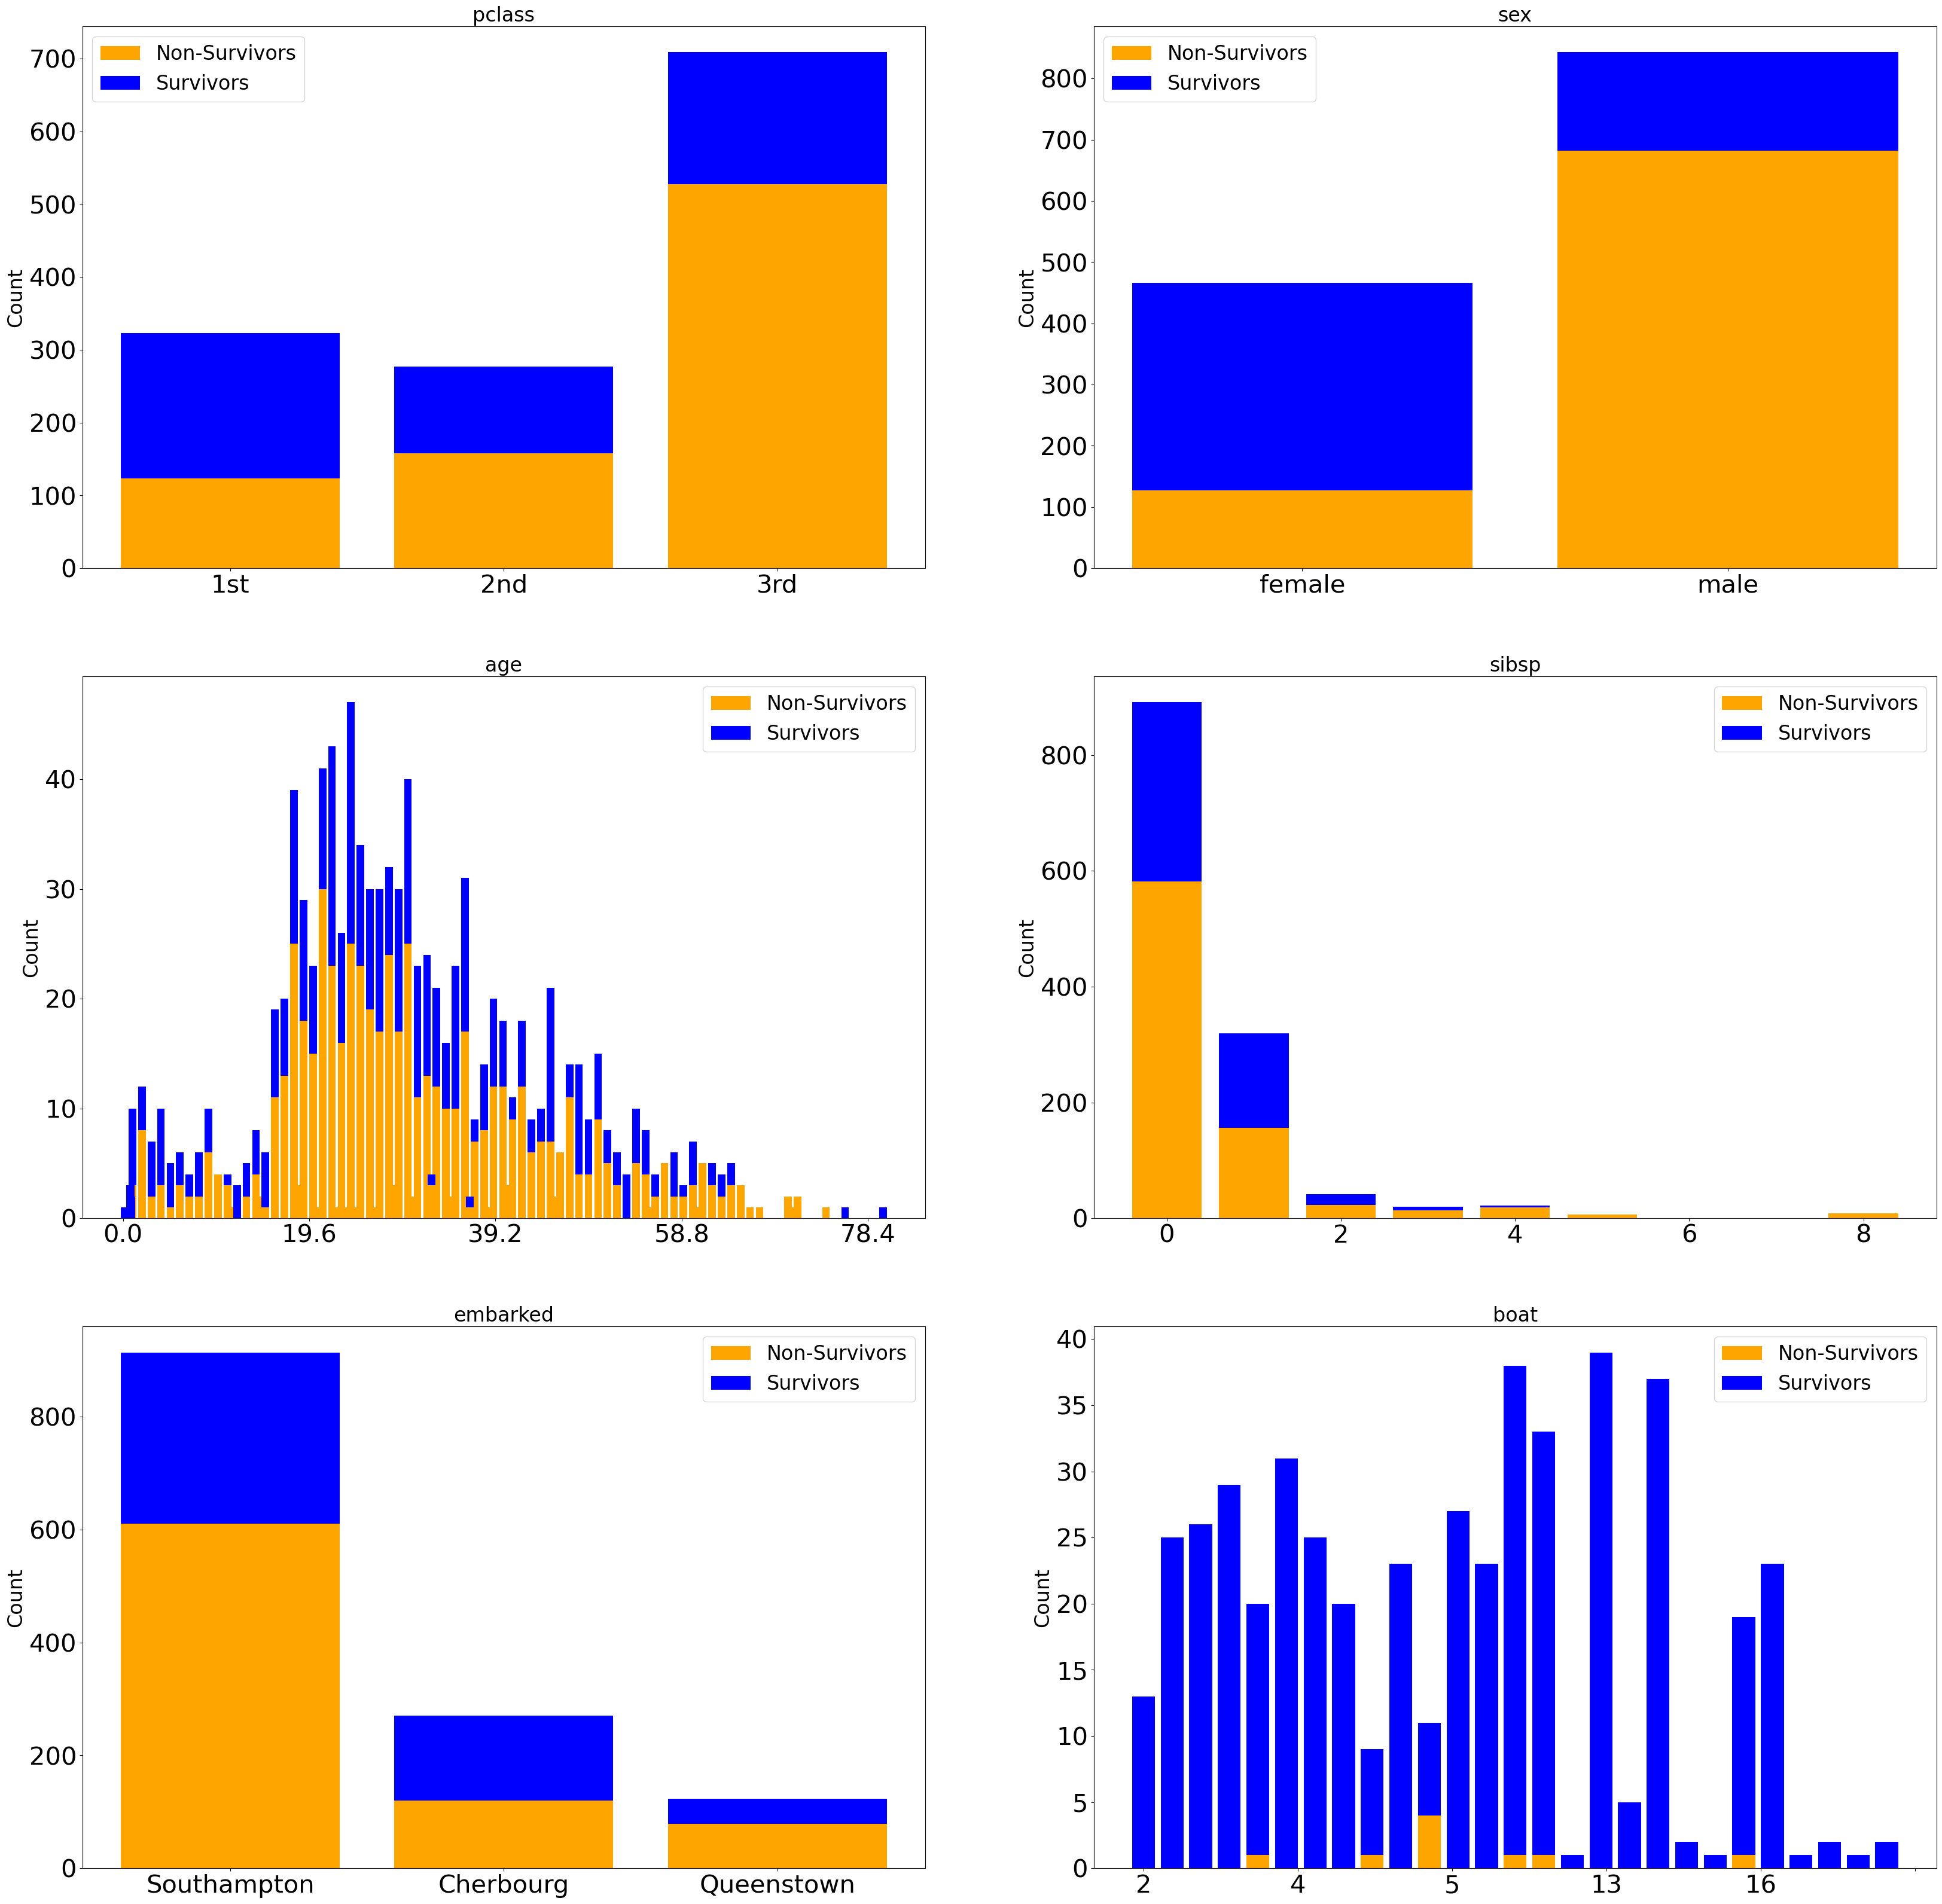

In [516]:
#Plotting the data using matplotlib
col = ["pclass","sex","age","sibsp","embarked","boat"]
plt.rcParams.update({'font.size': 30})
figure, axis = plt.subplots(3,2,figsize=(40, 40))
for i,ax in zip(col,axis.flatten()):
    d = createDict(df[i].tolist(),df["survived"].tolist())
    survivorList = createList(d)
    if(len(d.keys()) > 20):
        ax.set_xticks(np.arange(0,100, len(d.keys())/5))
    ax.bar(d.keys(), survivorList[1], color="Orange")
    ax.bar(d.keys(),survivorList[0],bottom=survivorList[1], color="Blue")
    ax.set_ylabel("Count",fontsize=24)
    ax.legend(["Non-Survivors", "Survivors"],fontsize=24)
    ax.set_title(i,fontsize=24)

#We can observe from the data that, the one who managed to board on the rescue boat survived

In [517]:
# Considering the columns for splitting the data.
df_train = df[["pclass","sex","age","sibsp"]]   #These are the independent variables
df_test = df[["survived"]]                      #This is the dependent variable
df_train = df_train.replace('',float('NaN'))
tempDf = pd.get_dummies(df_train[['pclass','sex']])  # Create the dummies for pclass and sex as these are the categorical values
df_train = pd.concat([df_train, tempDf], axis=1)     #Add the dummy dataframe into main dataframe
df_train = df_train.drop(["pclass","sex","pclass_1st","sex_male"], axis=1) #Drop the columns which are of no use as 
                                                                           #the dummy variable is used

In [518]:
#Splitting the data
X_train,X_test,y_train,y_test = train_test_split(df_train,df_test,test_size=0.3, random_state=101)

In [519]:
#Creating the instance of classifier and fitting the training data 
dtree = DecisionTreeClassifier(max_depth = 5, random_state = 0)
dtree = dtree.fit(X_train, y_train)

In [520]:
# text_representation = tree.export_text(dtree)
# print(text_representation)

[Text(0.4166666666666667, 0.9166666666666666, 'sex_female <= 0.5\ngini = 0.471\nsamples = 916\nvalue = [569, 347]'),
 Text(0.125, 0.75, 'age <= 9.5\ngini = 0.434\nsamples = 596\nvalue = [479, 117]'),
 Text(0.09722222222222222, 0.5833333333333334, 'gini = 0.458\nsamples = 31\nvalue = [11, 20]'),
 Text(0.1527777777777778, 0.5833333333333334, 'age <= 19.5\ngini = 0.284\nsamples = 565\nvalue = [468, 97]'),
 Text(0.05555555555555555, 0.4166666666666667, 'age <= 12.5\ngini = 0.19\nsamples = 179\nvalue = [160, 19]'),
 Text(0.027777777777777776, 0.25, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.08333333333333333, 0.25, 'age <= 18.75\ngini = 0.177\nsamples = 173\nvalue = [156, 17]'),
 Text(0.05555555555555555, 0.08333333333333333, 'gini = 0.1\nsamples = 38\nvalue = [36, 2]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.198\nsamples = 135\nvalue = [120, 15]'),
 Text(0.25, 0.4166666666666667, 'age <= 38.25\ngini = 0.322\nsamples = 386\nvalue = [308, 78]'),
 Text(0.194444444

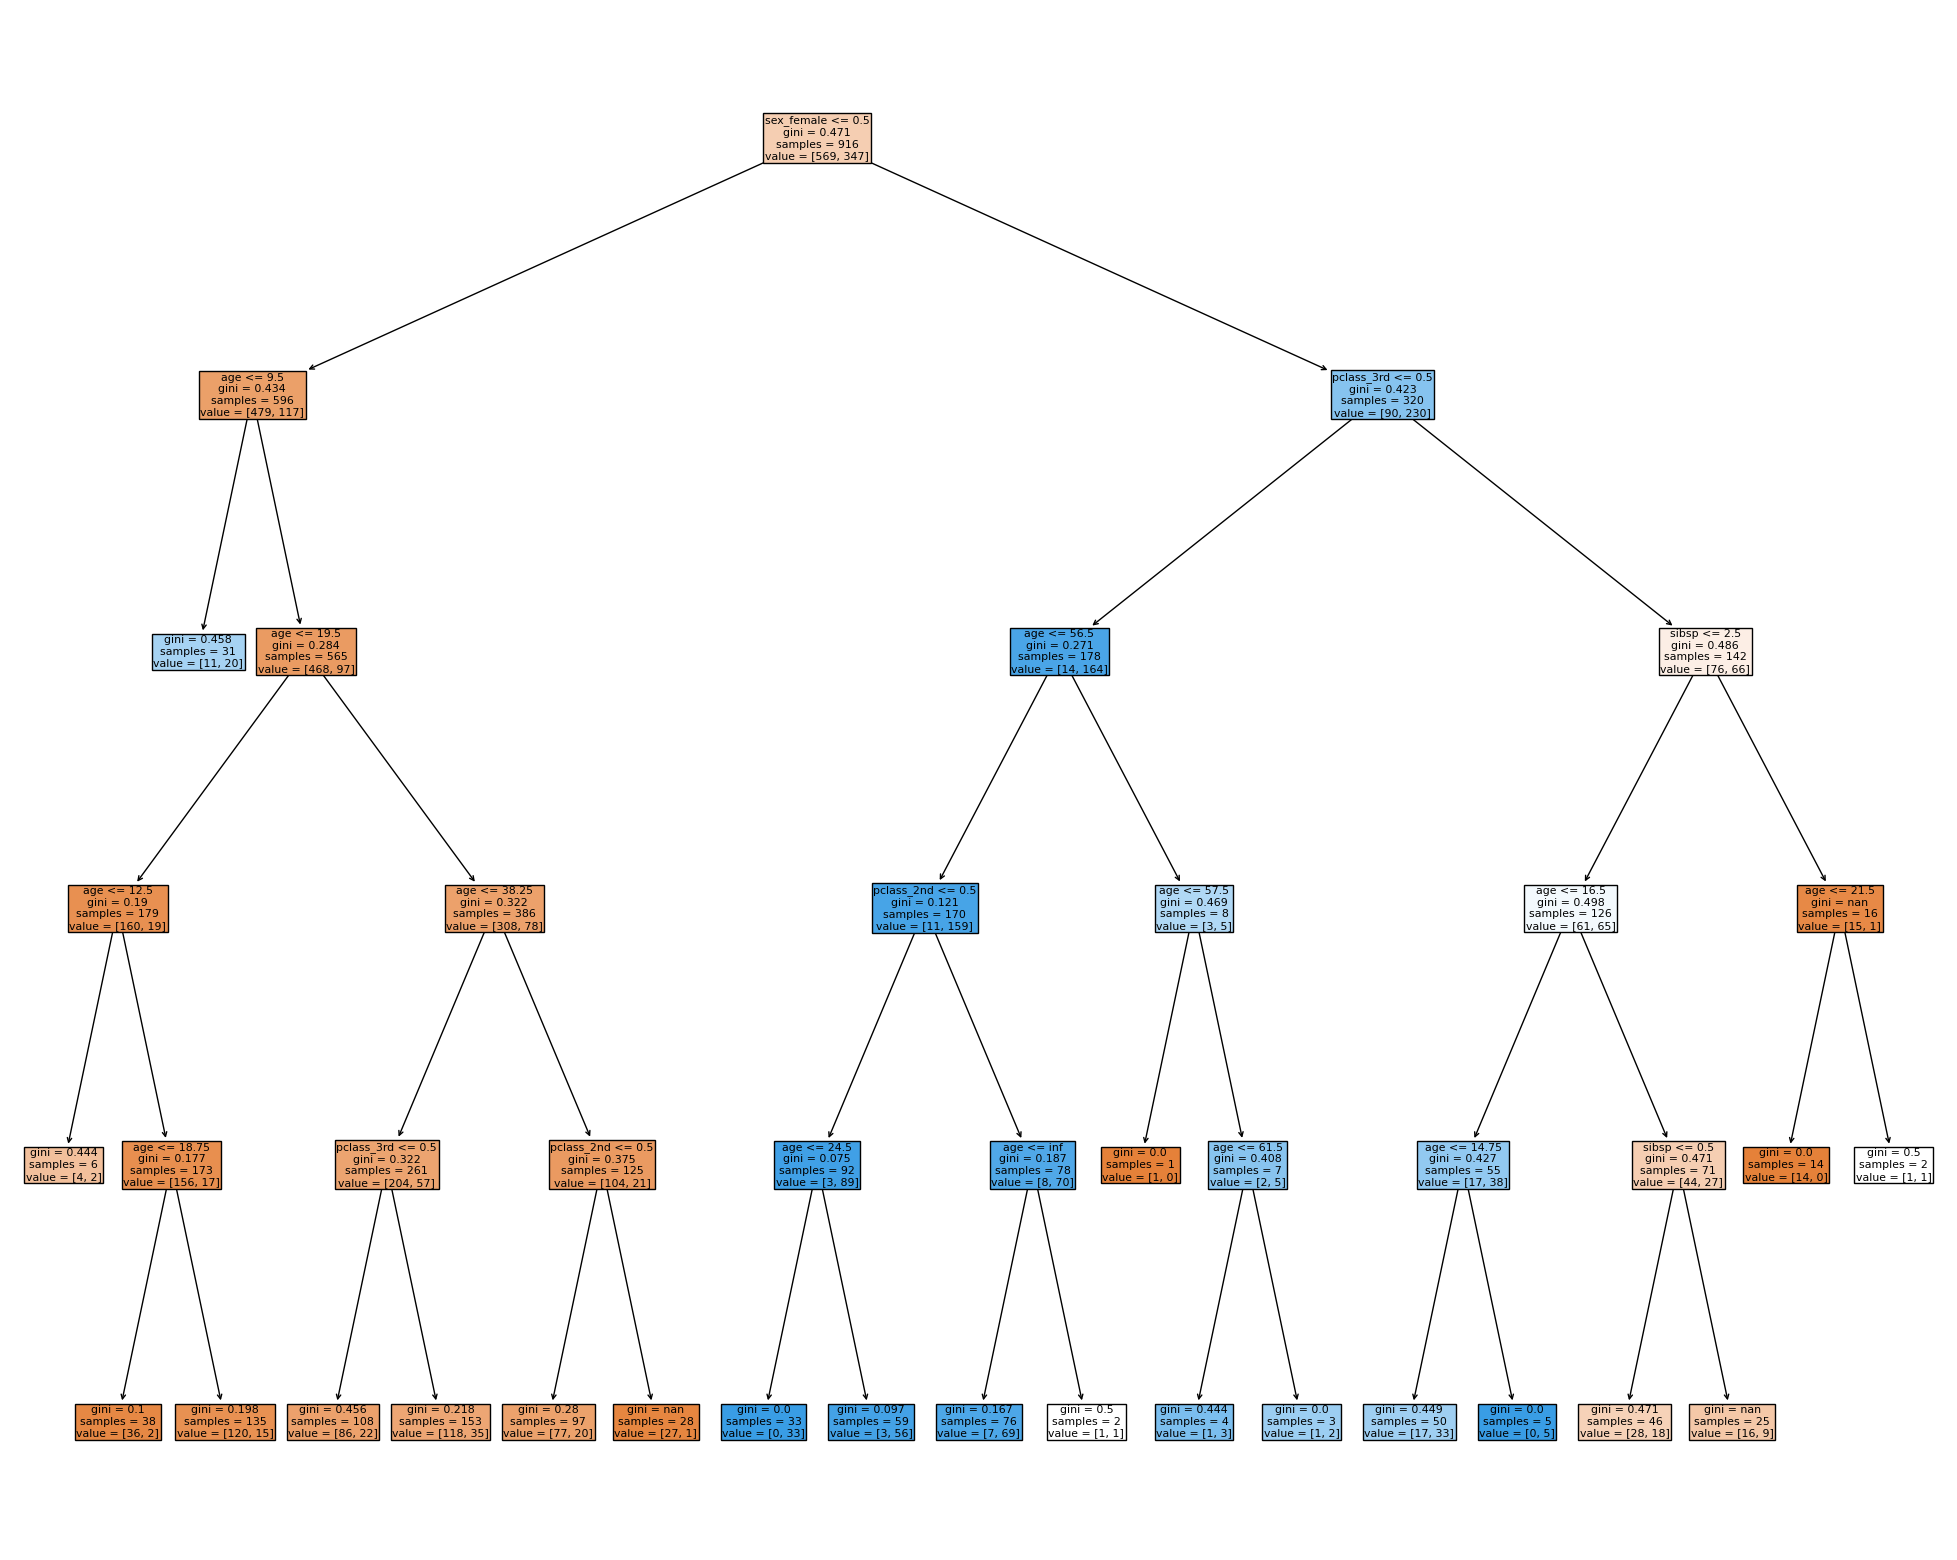

In [521]:
#Plotting the tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtree, 
                   feature_names=["age","sibsp","pclass_2nd","pclass_3rd","sex_female"],
                   filled=True)

In [522]:
#Calculating the accuracy
y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [538]:
#Calulating the misclassification using Kfold classification by varrying the tree size from 1 to 30
tree_sizes = range(1, 30)
misclassifications = []
for size in tree_sizes:
    model = DecisionTreeClassifier(max_depth=size)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    misclassification = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')['test_score'].mean()
    misclassifications.append(misclassification)


In [539]:
print(misclassifications)

[0.7467628890472795, 0.7391126158232358, 0.7576740318365408, 0.7915538132573058, 0.7948503207412687, 0.7533024471370873, 0.7882810643858399, 0.7576918507959135, 0.7937099073414113, 0.7369149441672607, 0.780624851508672, 0.7434723212164409, 0.7773402233309574, 0.7707887859349014, 0.7773580422903302, 0.7697137087194108, 0.7751900688999762, 0.7522036113090995, 0.7980993110002377, 0.7751781895937275, 0.7675338560228082, 0.7827928248990259, 0.7545022570681873, 0.7773699215965788, 0.7959313376098837, 0.7828225231646472, 0.7729508196721311, 0.760976478973628, 0.7784568781183179]


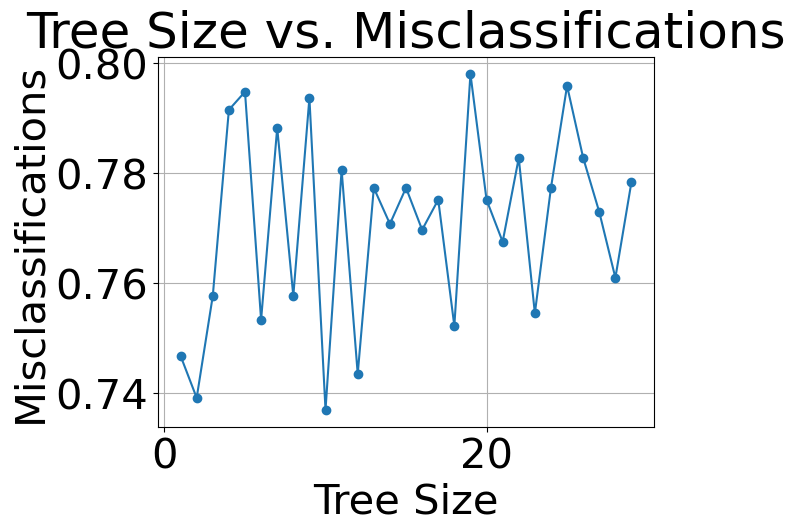

In [540]:
#Plotting the misclassification vs tree size for analysis of the best tree size/depth
plt.plot(tree_sizes, misclassifications, marker='o')
plt.title('Tree Size vs. Misclassifications')
plt.xlabel('Tree Size')
plt.ylabel('Misclassifications')
plt.grid(True)
plt.show()

As seen above the best depth is 2 

[Text(0.5, 0.8333333333333334, 'sex_female <= 0.5\ngini = 0.471\nsamples = 916\nvalue = [569, 347]'),
 Text(0.25, 0.5, 'age <= 9.5\ngini = 0.434\nsamples = 596\nvalue = [479, 117]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.458\nsamples = 31\nvalue = [11, 20]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.284\nsamples = 565\nvalue = [468, 97]'),
 Text(0.75, 0.5, 'pclass_3rd <= 0.5\ngini = 0.423\nsamples = 320\nvalue = [90, 230]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.271\nsamples = 178\nvalue = [14, 164]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.486\nsamples = 142\nvalue = [76, 66]')]

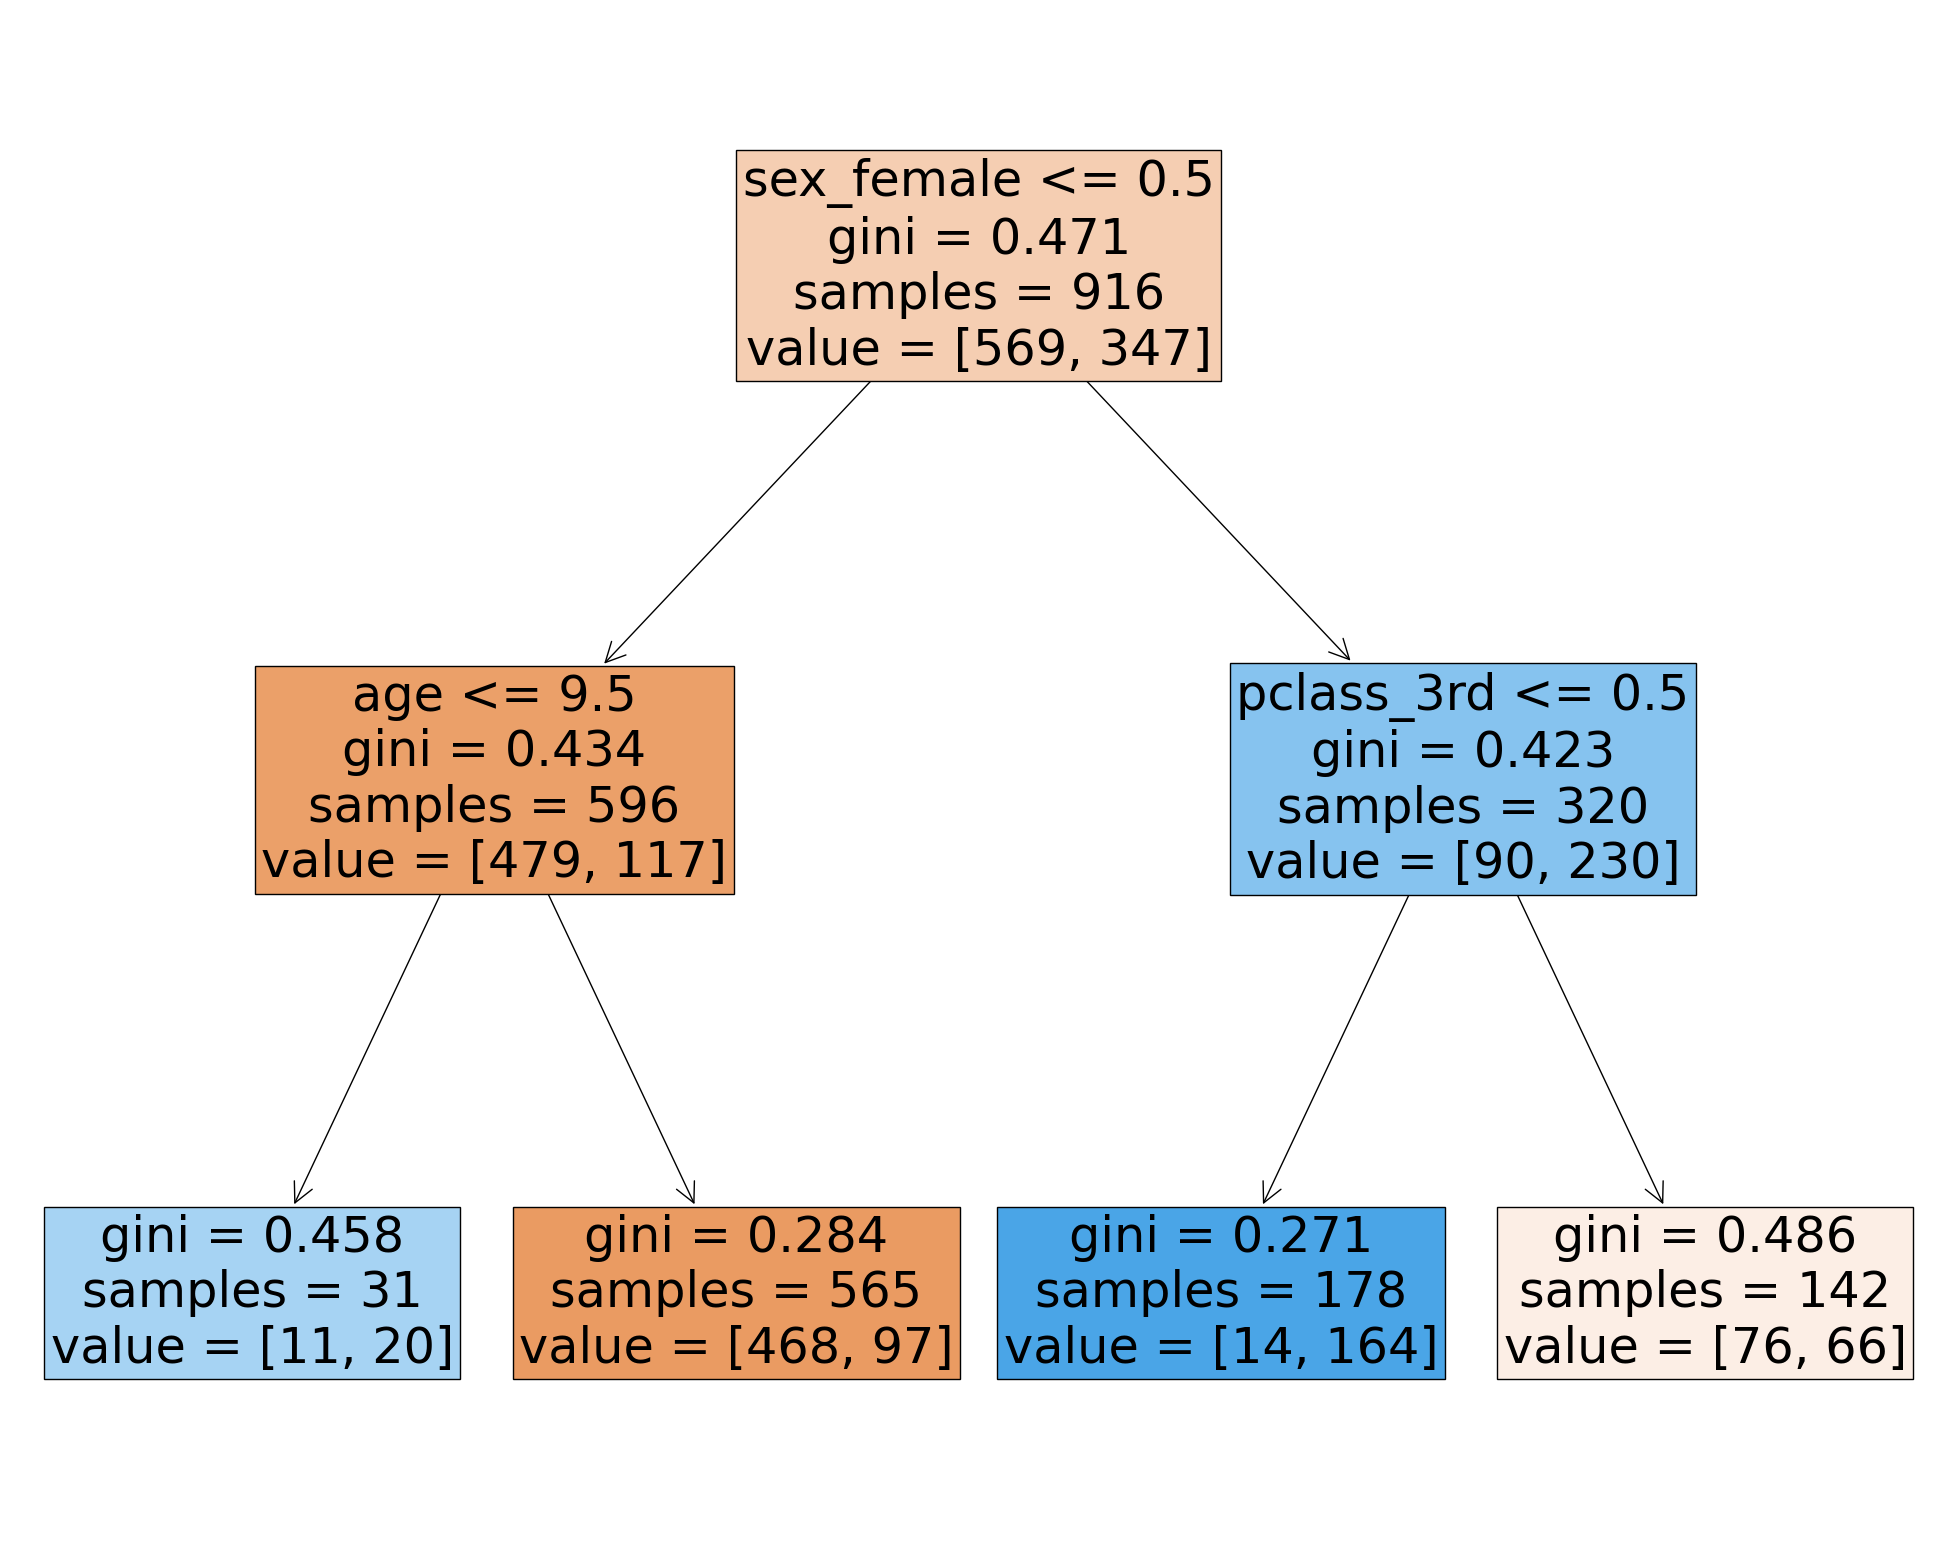

In [444]:
#Fitting the classifier using the best depth found in the above step and plotting the tree
dtree = DecisionTreeClassifier(max_depth = 2, random_state = 0)
dtree = dtree.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtree, 
                   feature_names=["age","sibsp","pclass_2nd","pclass_3rd","sex_female"],
                   filled=True)

In [445]:
y_pred = dtree.predict(X_test) #Predicting the values

In [446]:
#Calculating the accuracy

accuracy = accuracy_score(y_test, y_pred)

print(f"Total Accuracy: {accuracy:.2f}")

Total Accuracy: 0.77


In [447]:
#Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [448]:
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negative

In [449]:
print("percent survivors correctly predicted",((TP/(TP+conf_matrix[0, 1]))*100))
print("percent fatalities correctly predicted",((TN/(TN+conf_matrix[1, 0]))*100))

percent survivors correctly predicted 88.09523809523809
percent fatalities correctly predicted 74.4336569579288


#Random Forest

In [450]:
df_train = pd.concat([df_train, df_test], axis=1)
df_train.dropna(inplace = True)
df_test = df_train["survived"]
df_train.drop(["survived"], axis=1)

,age,sibsp,pclass_2nd,pclass_3rd,sex_female
0,29.0000,0,0,0,1
1,0.9167,1,0,0,0
2,2.0000,1,0,0,1
3,30.0000,1,0,0,0
4,25.0000,1,0,0,1
...,...,...,...,...,...
1301,45.5000,0,0,1,0
1304,14.5000,1,0,1,1
1306,26.5000,0,0,1,0
1307,27.0000,0,0,1,0


In [451]:
X_train,X_test,y_train,y_test = train_test_split(df_train,df_test,test_size=0.3, random_state=101)

In [452]:
#Fitting the data in random forest classifier
clf = RandomForestClassifier(n_estimators=50,max_depth=3,random_state=42)  # You can adjust n_estimators and other hyperparameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

In [453]:
##Predicting the values
y_pred = clf.predict(X_test)

In [454]:
#Calculating the accuracy

accuracy = accuracy_score(y_test, y_pred)

print(f"Total Accuracy: {accuracy:.2f}")

Total Accuracy: 1.00


In [455]:
#Calculating the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negative
print("percent survivors correctly predicted",((TP/(TP+conf_matrix[0, 1]))*100))
print("percent fatalities correctly predicted",((TN/(TN+conf_matrix[1, 0]))*100))

percent survivors correctly predicted 100.0
percent fatalities correctly predicted 100.0


As we can see there is 100 % accuracy in predictions. 
So we can conclude that random forest is better compared to descision tree in this case